In [2]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import numpy as np

In [3]:
import sys
sys.path.append('../programming_scripts/')

from MS2LDA_core import run_lda
from MS2LDA_core import predict_with_lda

from SMART_annotation import annotate_motifs

/Users/rosinatorres/anaconda3/envs/MS2LDA_v2/lib/python3.11/site-packages/sparsestack/StackedSparseArray.py:4: DeprecationWarning: Please use `get_index_dtype` from the `scipy.sparse` namespace, the `scipy.sparse.sputils` namespace is deprecated.
  from scipy.sparse.sputils import get_index_dtype


In [4]:
spectra_path = r"/Users/rosinatorres/Documents/PhD/Project/Data/GNPS-NIH-NATURALPRODUCTSLIBRARY.mgf"

In [8]:
lda_model, corpus, id2word = run_lda(spectra_path=spectra_path, num_motifs=100)

In [9]:
# Print all the topics and one line below you can see the words (fragments or losses) and there importance (the number they are multiplied with)
for index, topic in lda_model.print_topics(-1):
    print(f"Topic: {index + 1} \nWords: {topic}")

Topic: 1 
Words: 0.014*"121.07+" + 0.013*"153.02+" + 0.011*"273.1+" + 0.006*"149.02+" + 0.006*"105.03+" + 0.006*"226.09" + 0.006*"293.69" + 0.006*"386.79" + 0.006*"213.06+" + 0.006*"31.99"
Topic: 2 
Words: 0.006*"153.02+" + 0.006*"215.07+" + 0.005*"271.06+" + 0.005*"187.1+" + 0.005*"188.07+" + 0.004*"203.07+" + 0.004*"231.1+" + 0.004*"229.09+" + 0.003*"166.04+" + 0.003*"269.08+"
Topic: 3 
Words: 0.006*"191.12+" + 0.005*"176.07+" + 0.005*"149.07" + 0.005*"179.07" + 0.005*"161.06+" + 0.004*"165.06+" + 0.004*"159.04+" + 0.004*"189.05+" + 0.004*"133.06+" + 0.004*"209.07+"
Topic: 4 
Words: 0.019*"107.06+" + 0.018*"241.09+" + 0.017*"105.03+" + 0.013*"283.1+" + 0.013*"255.1+" + 0.012*"149.07+" + 0.008*"249.07+" + 0.007*"165.06+" + 0.007*"232.12" + 0.007*"197.0"
Topic: 5 
Words: 0.016*"147.06+" + 0.008*"165.06+" + 0.007*"160.08+" + 0.007*"175.05+" + 0.007*"189.1+" + 0.007*"133.05+" + 0.007*"146.06+" + 0.007*"217.1+" + 0.006*"260.14+" + 0.006*"146.02+"
Topic: 6 
Words: 0.019*"128.07+" + 0.014*"

In [10]:
pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
#The larger the buble, the higer percentage of the number of fragments/losses in the corpus is about that topic

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
49    -0.057710  0.002042       1        1  1.960363
28    -0.142170  0.025090       2        1  1.938009
65    -0.039862  0.069944       3        1  1.909855
34     0.059400 -0.010580       4        1  1.845938
68    -0.185440 -0.023623       5        1  1.750305
...         ...       ...     ...      ...       ...
72     0.012414  0.058843      96        1  0.502277
41     0.019857 -0.030143      97        1  0.486462
52     0.044805 -0.016122      98        1  0.477596
75    -0.012025 -0.043432      99        1  0.461207
51     0.032188  0.017501     100        1  0.405355

[100 rows x 5 columns], topic_info=          Term         Freq        Total  Category  logprob  loglift
3563   241.09+  2403.000000  2403.000000   Default  30.0000  30.0000
1444    217.1+  3902.000000  3902.000000   Default  29.0000  29.0000
1948   121.07+  3783.000000  3783.000000   Default  28.0000  28.0000
1410   147.06+  3363.000000  3363.000000   Default  27.0000  27.0000
15612  153.02+  2353.000000  2353.000000   Default  26.0000  26.0000
...        ...          ...          ...       ...      ...      ...
1030   203.07+    34.776059  4796.791261  Topic100  -5.3069   0.5814
1447    218.1+    26.678192  2541.899782  Topic100  -5.5720   0.9513
705    189.07+    21.047182   622.873478  Topic100  -5.8091   2.1206
100    131.07+    20.860837  1154.566347  Topic100  -5.8180   1.4946
140    146.06+    21.370446  4832.451120  Topic100  -5.7938   0.0871

[6412 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
28478     13  0.029382     0.59
28478     58  0.940210     0.59
33985     14  0.222286      1.1
33985     74  0.622400      1.1
33985     82  0.044457      1.1
...      ...       ...      ...
51534     59  0.130584  995.32+
67256     58  0.161337   998.0+
67256     75  0.161337   998.0+
67256     86  0.645348   998.0+
782       11  0.601749  999.87+

[70508 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[50, 29, 66, 35, 69, 41, 2, 20, 83, 93, 27, 16, 75, 25, 58, 54, 92, 38, 57, 94, 98, 48, 99, 77, 13, 15, 97, 31, 84, 45, 47, 89, 21, 72, 82, 34, 79, 46, 56, 65, 8, 86, 88, 10, 91, 1, 14, 80, 28, 11, 5, 55, 17, 23, 33, 7, 3, 24, 37, 49, 78, 19, 40, 43, 100, 44, 4, 87, 96, 51, 62, 61, 60, 95, 81, 26, 59, 64, 6, 22, 68, 18, 9, 12, 32, 67, 36, 70, 71, 90, 39, 63, 74, 85, 30, 73, 42, 53, 76, 52])

In [62]:
vis=pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
pyLDAvis.save_html(vis, 'lda_visualization-GNPS-NIH-Library-n100.html')

In [ ]:
#Our model will be better if the words in a topic are similar, so we will use topic coherence to evaluate our model. 
#Topic coherence evaluates a single topic by measuring the degree of semantic similarity between high scoring words in the topic. 
#A good model will generate topics with high topic coherence scores?

[('107.06+', 0.019025527), ('241.09+', 0.01839843), ('105.03+', 0.016702347), ('283.1+', 0.013260205), ('255.1+', 0.013200388), ('149.07+', 0.011973705), ('249.07+', 0.007710719), ('165.06+', 0.0073440424), ('232.12', 0.0071073626), ('197.0', 0.007104492)]


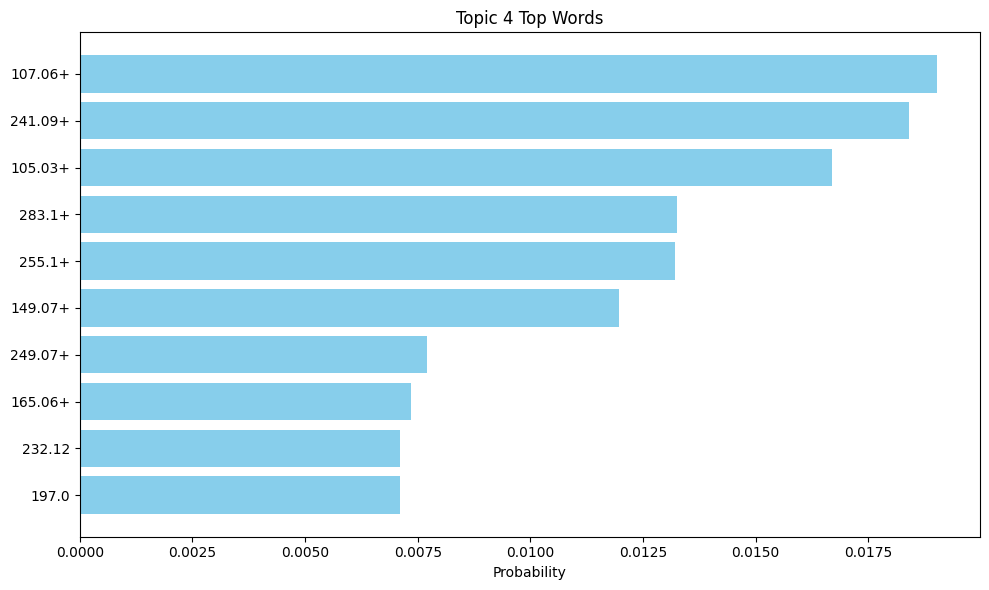

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Select topic one specifically
topic_num = 3

# Get the top words and their probabilities for topic one
topic = lda_model.show_topic(topic_num)
print(topic)

# Extract word labels and probabilities
word_labels, word_probs = zip(*topic)


# Plotting
plt.figure(figsize=(10, 6))
plt.barh(word_labels, word_probs, color='skyblue')
plt.xlabel('Probability')
plt.title(f'Topic {topic_num + 1} Top Words')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest probability at the top
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


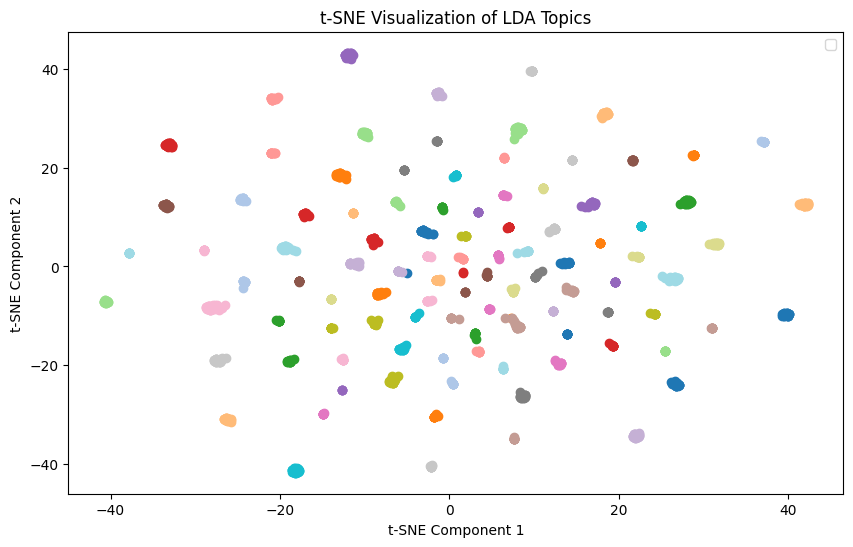

In [31]:
#I wanted to see the distribution of the topics 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import LatentDirichletAllocation

# Create the document-topic matrix from the LDA model
lda_output = np.zeros((len(corpus), lda_model.num_topics))  # Initialize an empty matrix

for i, doc in enumerate(corpus):
    topic_probs = lda_model.get_document_topics(doc, minimum_probability=0)
    for topic, prob in topic_probs:
        lda_output[i, topic] = prob

# Initialize and fit t-SNE model
tsne_model = TSNE(n_components=2, random_state=42)
tsne_result = tsne_model.fit_transform(lda_output)

# Generate colors for each topic
colors = plt.cm.tab20(np.linspace(0, 1, lda_model.num_topics))

# Plot t-SNE output with colors
plt.figure(figsize=(10, 6))
for i in range(lda_model.num_topics):
    topic_indices = np.where(lda_output.argmax(axis=1) == i)
    plt.scatter(tsne_result[topic_indices, 0], tsne_result[topic_indices, 1], color=colors[i])
plt.title('t-SNE Visualization of LDA Topics')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


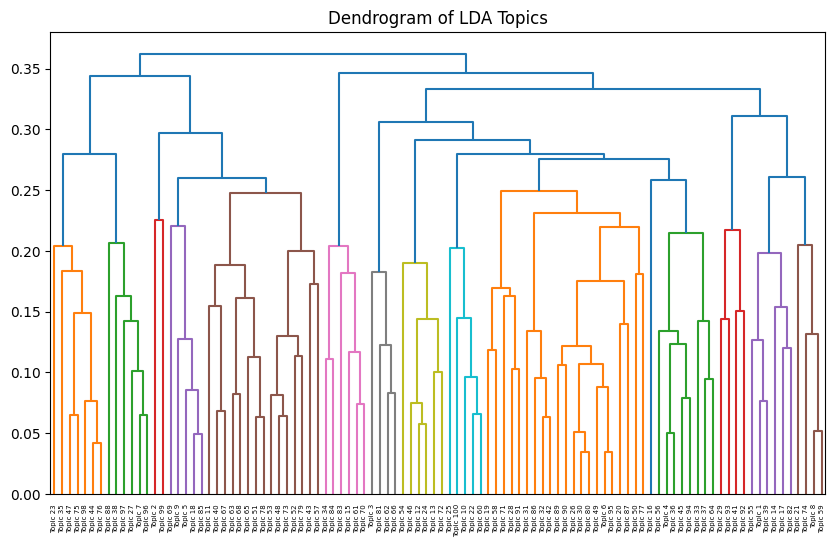

ValueError: not enough values to unpack (expected 2, got 1)

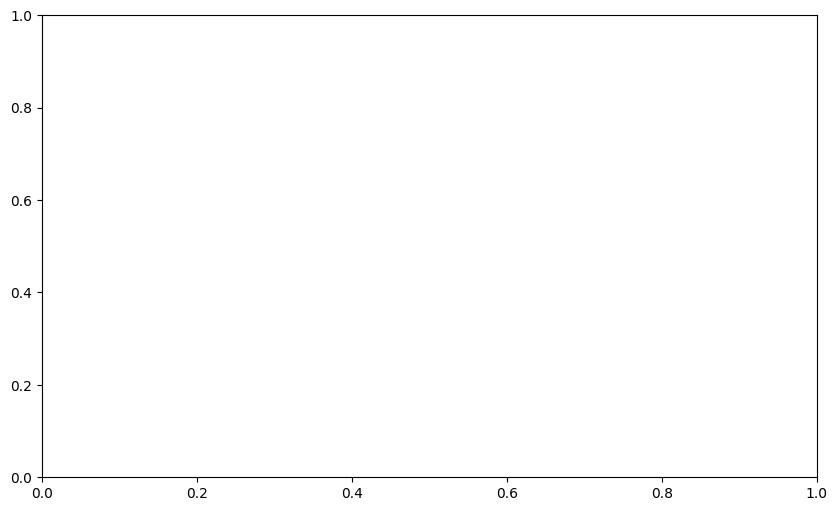

In [15]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage

num_topics = 100
topic_names = [f"Topic {i}" for i in range(1, num_topics + 1)]


def plot_hierarchical_heatmap(lda_model, topic_names):
  """
  This function plots a heatmap to visualize topic similarities based on hierarchical clustering.

  Args:
      lda_model (gensim.models.LdaModel): The trained LDA model.
      topic_names (list): List of topic names (one for each topic).
  """
  # Get the topic-word matrix from the LDA model
  topic_word_matrix = lda_model.get_topics()

  # Calculate pairwise topic similarities using cosine similarity
  distance_matrix = 1 - pdist(topic_word_matrix, metric='cosine')

  # Perform hierarchical clustering (Ward's method)
  linkage_matrix = linkage(distance_matrix, method='ward')

  # Generate the dendrogram for visualization (optional)
  plt.figure(figsize=(10, 6))
  dendrogram(linkage_matrix, labels=topic_names)
  plt.title("Dendrogram of LDA Topics")
  plt.show()

  # Create a heatmap to visualize topic similarities
  plt.figure(figsize=(10, 6))
  plt.pcolor(distance_matrix, vmin=0, vmax=1)
  plt.colorbar(label='Topic Similarity (Cosine)')
  plt.xticks(range(len(topic_names)), topic_names, rotation=45)
  plt.yticks(range(len(topic_names)), topic_names)
  plt.xlabel('Topics')
  plt.ylabel('Topics')
  plt.title('Heatmap of Topic Similarities (Hierarchical Clustering)')
  plt.tight_layout()
  plt.show()

# Example usage (assuming you have a trained LDA model 'lda_model' and topic names 'topic_names')
plot_hierarchical_heatmap(lda_model, topic_names)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


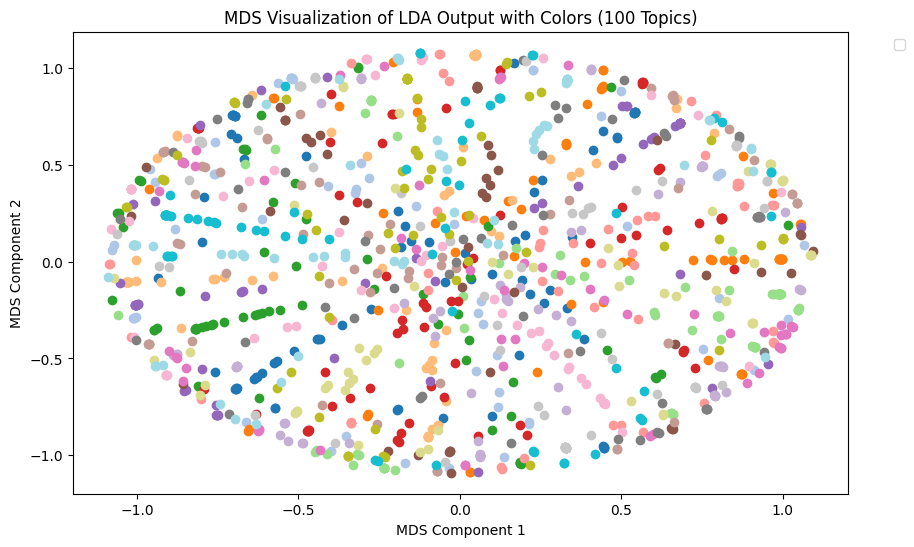

In [33]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'corpus' and 'lda_model' are defined elsewhere in your code

# Create the document-topic matrix from the LDA model
lda_output = np.zeros((len(corpus), lda_model.num_topics))

for i, doc in enumerate(corpus):
    topic_probs = lda_model.get_document_topics(doc, minimum_probability=0)
    for topic, prob in topic_probs:
        lda_output[i, topic] = prob

# Initialize and fit MDS model
mds_model = MDS(n_components=2, random_state=42)
mds_lda = mds_model.fit_transform(lda_output)

# Generate colors for each topic
colors = plt.cm.tab20(np.linspace(0, 1, lda_model.num_topics))

# Plot MDS output with colors
plt.figure(figsize=(10, 6))
for i in range(lda_model.num_topics):
    topic_indices = np.where(lda_output.argmax(axis=1) == i)
    plt.scatter(mds_lda[topic_indices, 0], mds_lda[topic_indices, 1], color=colors[i])
plt.title('MDS Visualization of LDA Output with Colors (100 Topics)')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


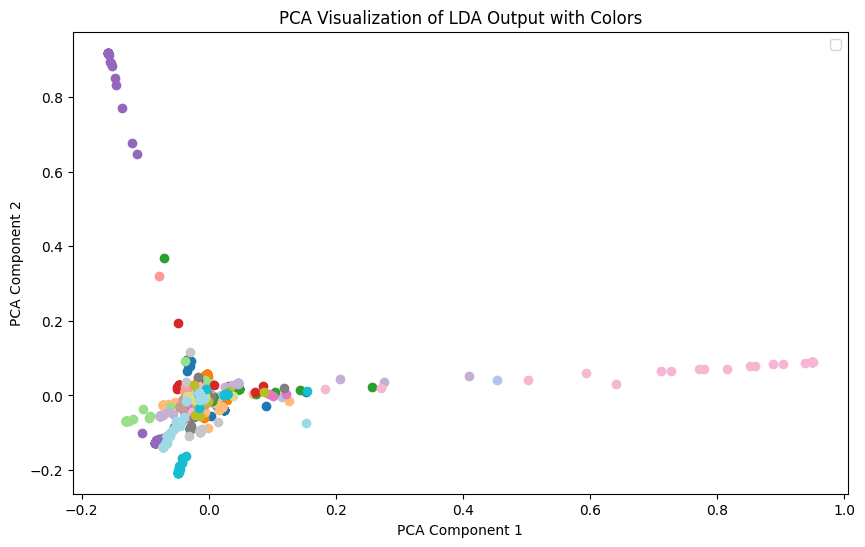

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'corpus' and 'lda_model' are defined elsewhere in your code

# Create the document-topic matrix from the LDA model
lda_output = np.zeros((len(corpus), lda_model.num_topics))

for i, doc in enumerate(corpus):
    topic_probs = lda_model.get_document_topics(doc, minimum_probability=0)
    for topic, prob in topic_probs:
        lda_output[i, topic] = prob

# Initialize and fit PCA model
pca_model = PCA(n_components=2, random_state=42)
pca_lda = pca_model.fit_transform(lda_output)

# Generate colors for each topic
colors = plt.cm.tab20(np.linspace(0, 1, lda_model.num_topics))

# Plot PCA output with colors
plt.figure(figsize=(10, 6))
for i in range(lda_model.num_topics):
    topic_indices = np.where(lda_output.argmax(axis=1) == i)
    plt.scatter(pca_lda[topic_indices, 0], pca_lda[topic_indices, 1], color=colors[i])
plt.title('PCA Visualization of LDA Output with Colors')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

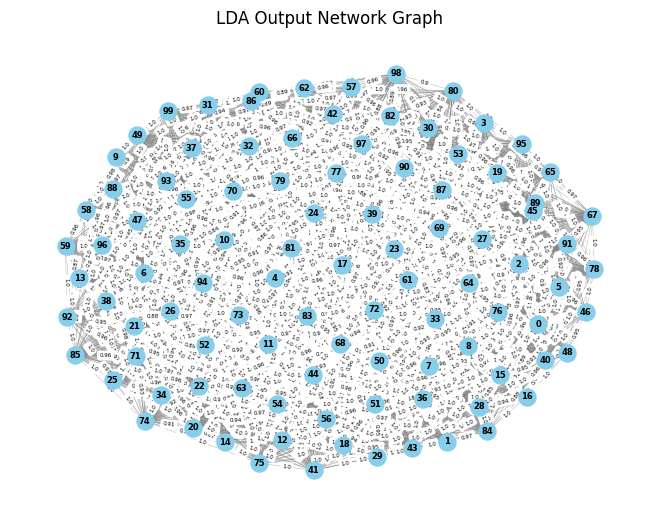

In [55]:
import networkx as nx
from gensim.matutils import jaccard
from itertools import combinations

# Create a network of topics based on similarity
topic_similarities = np.zeros((lda_model.num_topics, lda_model.num_topics))

# Compute Jaccard similarity between topics
for i, j in combinations(range(lda_model.num_topics), 2):
    topic1 = lda_model.get_topic_terms(i)
    topic2 = lda_model.get_topic_terms(j)
    jaccard_similarity = jaccard(topic1, topic2)
    topic_similarities[i, j] = jaccard_similarity
    topic_similarities[j, i] = jaccard_similarity

# Create a network graph
G = nx.Graph()

# Add nodes
for i in range(lda_model.num_topics):
    G.add_node(i, label=f'Topic {i}')

# Add edges based on similarity
for i in range(lda_model.num_topics):
    for j in range(i+1, lda_model.num_topics):
        similarity = topic_similarities[i, j]
        if similarity > 0:
            G.add_edge(i, j, weight=similarity)

# Draw the network graph
pos = nx.spring_layout(G)  # You can try different layout algorithms
nx.draw(G, pos, with_labels=True, font_weight='bold', font_size=6, node_size=150, node_color='skyblue', font_color='black', edge_color='gray', width=0.2)

# Add edge labels (weights)
edge_labels = {(edge[0], edge[1]): round(attr['weight'], 2) for edge, attr in G.edges.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=4)

plt.title('LDA Output Network Graph')
plt.show()

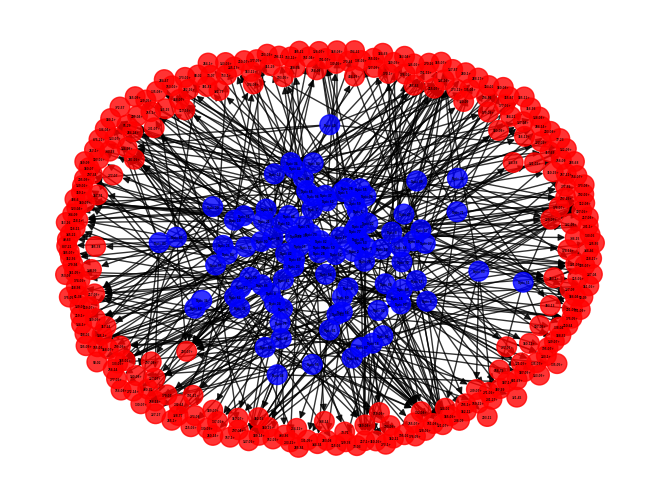

In [41]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming 'lda_model' and 'dictionary' are defined elsewhere in your code

# Create a directed graph
G = nx.DiGraph()

# Add nodes for topics
for topic_id in range(lda_model.num_topics):
    G.add_node(f'Topic {topic_id}', color='blue')

# Add nodes for words and edges connecting them to topics
for topic_id in range(lda_model.num_topics):
    topic_words = lda_model.show_topic(topic_id, topn=5)  # Choose top 5 words per topic for visualization
    for word, weight in topic_words:
        G.add_node(word, color='red')
        G.add_edge(f'Topic {topic_id}', word, weight=weight)

# Set node colors based on their type
node_colors = [data['color'] for _, data in G.nodes(data=True)]

# Draw the network
pos = nx.spring_layout(G, seed=42)  # Position nodes using spring layout algorithm
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=200, font_size=2, font_weight='bold', alpha=0.8)

# Adjust plot settings
plt.axis('off')

# Show the plot
plt.show()

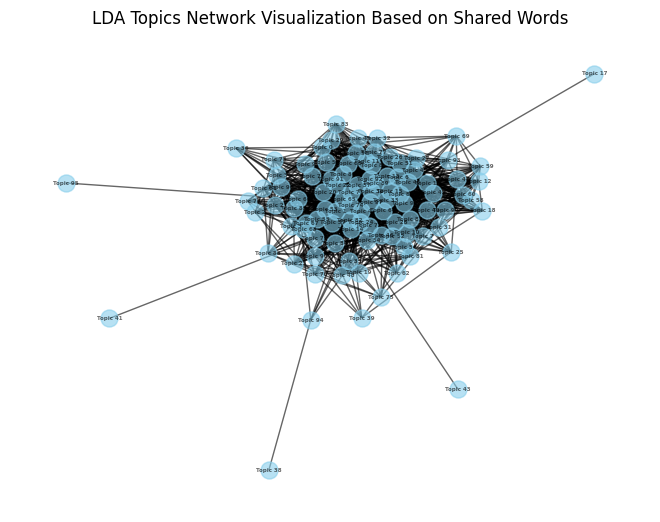

In [47]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes for topics
for topic_id in range(lda_model.num_topics):
    G.add_node(f'Topic {topic_id}')

# Add edges between topics based on shared words
for topic_id1 in range(lda_model.num_topics):
    for topic_id2 in range(topic_id1 + 1, lda_model.num_topics):
        # Get the top words for each topic
        topic_words1 = set([word for word, _ in lda_model.show_topic(topic_id1)])
        topic_words2 = set([word for word, _ in lda_model.show_topic(topic_id2)])
        # Calculate the shared words between topics
        shared_words = topic_words1.intersection(topic_words2)
        # Add an edge if there are shared words
        if shared_words:
            G.add_edge(f'Topic {topic_id1}', f'Topic {topic_id2}', shared_words=shared_words)

# Draw the network
pos = nx.spring_layout(G, seed=42)  # Position nodes using spring layout algorithm
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=150, font_size=4, font_weight='bold', alpha=0.6)

# Adjust plot settings
plt.title('LDA Topics Network Visualization Based on Shared Words')
plt.axis('off')

# Show the plot
plt.show()

In [42]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model = CoherenceModel(model=lda_model, texts=corpus, dictionary=id2word, coherence='c_uci')
coherence_score = coherence_model.get_coherence()
print(f'Coherence Score: {coherence_score}')

/Users/rosinatorres/anaconda3/envs/MS2LDA_v2/lib/python3.11/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in scalar divide
  m_lr_i = np.log(numerator / denominator)


Coherence Score: inf


In [40]:
smiles_per_motifs, predicted_motifs = predict_with_lda(lda_model, spectra_path, id2word)

In [41]:
annotated_motifs = []
purities_maccs = []
for smiles_per_motif in smiles_per_motifs:
    annotated_motif, purity_maccs = annotate_motifs(smiles_per_motif)
    annotated_motifs.append(annotated_motif)
    purities_maccs.append(purity_maccs)

/Users/rosinatorres/Documents/PhD/Project/Code/MS2LDA/MS2LDA_v2/notebooks/../programming_scripts/SMART_annotation.py:31: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


In [42]:
for motif_number, purity_maccs in enumerate(purities_maccs):
    purity_maccs_nan = purity_maccs.copy()
    purity_maccs_nan[purity_maccs_nan == 0] = np.nan
    print(motif_number, len(smiles_per_motifs[motif_number]),len(annotated_motifs[motif_number]), np.nanmean(purity_maccs_nan))

0 0 0 nan
1 0 0 nan
2 1 37 1.0
3 1 58 1.0
4 1 47 1.0
5 1 35 1.0
6 0 0 nan
7 0 0 nan
8 0 0 nan
9 2 31 0.7012987012987013


/var/folders/38/c05qj4bx5cs2p6fnrp6w_nhh0000gn/T/ipykernel_14767/1280544715.py:4: RuntimeWarning: Mean of empty slice
  print(motif_number, len(smiles_per_motifs[motif_number]),len(annotated_motifs[motif_number]), np.nanmean(purity_maccs_nan))


In [43]:
from rdkit.Chem import Draw
from rdkit import Chem

### Known Dataset

In [144]:
motif_number = 62

In [145]:
len(annotated_motifs[motif_number])

9

In [146]:
annotated_motifs[motif_number]

['[!C;!c;R]',
 '*!:*:*!:*',
 '*!@*@*!@*',
 '*!@[CH2]!@*',
 '[#6]-[#8]',
 'a',
 '*1~*~*~*~*~*~1',
 '[#8]',
 '[R]']

In [147]:
len(smiles_per_motifs[motif_number])

14

In [148]:
smiles_per_motifs[motif_number]

['C1=CC(=C(C(=C1)F)C(=O)NC(=O)NC2=CC(=C(C=C2Cl)OC(C(C(F)(F)F)F)(F)F)Cl)F',
 'C1C(COC1(CN2C=NC=N2)C3=C(C=C(C=C3)Cl)Cl)Br',
 'C1=CC(=C(C=C1Cl)Cl)C(CN2C=NC=N2)COC(C(F)F)(F)F',
 'CC1=CC(=C(C(=C1)C)C2=C(C3(CCCC3)OC2=O)OC(=O)CC(C)(C)C)C',
 'CCCCC1=C(N=C(N=C1OS(=O)(=O)N(C)C)NCC)C',
 'CC(C)(C)C(C(CC1=CC=C(C=C1)Cl)N2C=NC=N2)O',
 'C1C(COC1(CN2C=NC=N2)C3=C(C=C(C=C3)Cl)Cl)Br',
 'C1=CC(=C(C=C1Cl)Cl)C(CN2C=NC=N2)COC(C(F)F)(F)F',
 'C1=CC=C(C(=C1)C2C(O2)(CN3C=NC=N3)C4=CC=C(C=C4)F)Cl',
 'CCCC(CN1C=NC=N1)C2=C(C=C(C=C2)Cl)Cl',
 'CN(C(=O)NC1=CC=C(C=C1)Cl)OC',
 'CC1=CC(=C(C(=C1)C)C2=C(C3(CCCC3)OC2=O)OC(=O)CC(C)(C)C)C',
 'CC1=CC(=C(C(=C1)C)C2=C(C3(CCCC3)OC2=O)OC(=O)CC(C)(C)C)C',
 'CCCC(CN1C=NC=N1)C2=C(C=C(C=C2)Cl)Cl']

In [149]:
mol_per_motif = [Chem.MolFromSmiles(smiles) for smiles in smiles_per_motifs[motif_number]]

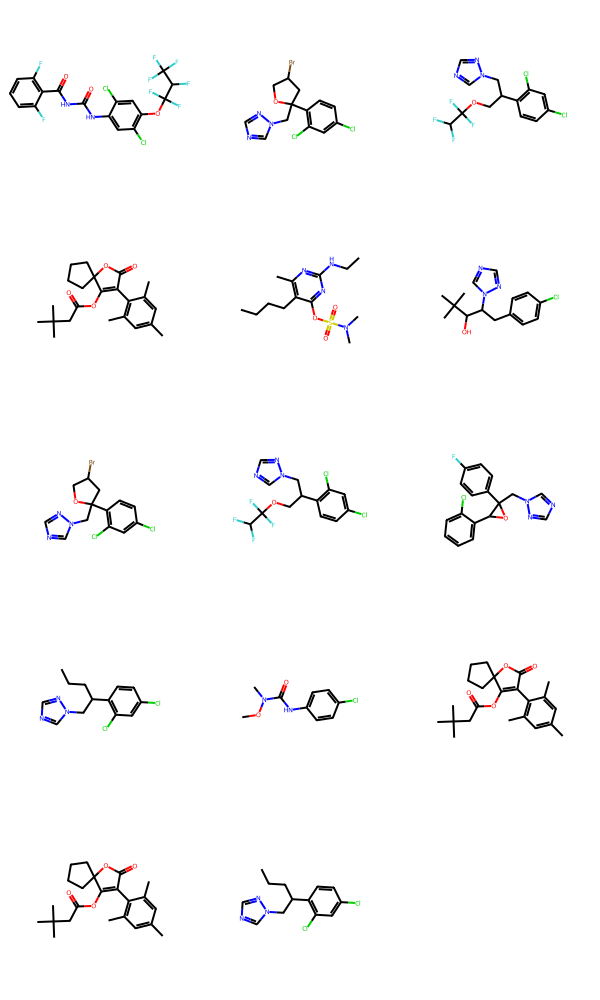

In [150]:
Draw.MolsToGridImage(mol_per_motif)

### to compare clusters you could use the tanimoto similarity for a binary motif fingerprint (not implemented yet) against another binary motif fingerprint

---

### Unknown Dataset

In [37]:
#spectra_path_diffDB = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-NIH-SMALLMOLECULEPHARMACOLOGICALLYACTIVE.mgf"
spectra_path_diffDB = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-SCIEX-LIBRARY.mgf"

In [38]:
smiles_per_motifs_diffDB, predicted_motifs_diffDB = predict_with_lda(lda_model, spectra_path_diffDB, id2word)

In [39]:
annotated_motifs_diffDB = []
purities_maccs_diffDB = []
for smiles_per_motif in smiles_per_motifs_diffDB:
    annotated_motif, purity_maccs = annotate_motifs(smiles_per_motif)
    annotated_motifs_diffDB.append(annotated_motif)
    purities_maccs_diffDB.append(purity_maccs)

In [40]:
for motif_number, purity_maccs in enumerate(purities_maccs_diffDB):
    purity_maccs_nan = purity_maccs.copy()
    purity_maccs_nan[purity_maccs_nan == 0] = np.nan
    print(motif_number, len(smiles_per_motifs_diffDB[motif_number]),len(annotated_motifs_diffDB[motif_number]), np.nanmean(purity_maccs_nan))

0 0 0 nan
1 0 0 nan
2 0 0 nan
3 0 0 nan
4 0 0 nan
5 0 0 nan
6 0 0 nan
7 0 0 nan
8 0 0 nan
9 0 0 nan
10 0 0 nan
11 0 0 nan
12 0 0 nan
13 1 24 1.0
14 0 0 nan
15 1 35 1.0
16 0 0 nan
17 0 0 nan
18 0 0 nan
19 0 0 nan
20 0 0 nan
21 1 41 1.0
22 0 0 nan
23 0 0 nan
24 1 43 1.0
25 0 0 nan
26 1 41 1.0
27 0 0 nan
28 2 23 0.6619718309859155
29 1 78 1.0
30 2 24 0.7790697674418605
31 1 38 1.0
32 0 0 nan
33 1 33 1.0
34 5 13 0.49855072463768113
35 0 0 nan
36 2 20 0.6666666666666666
37 1 70 1.0
38 1 61 1.0
39 2 29 0.7416666666666667
40 1 39 1.0
41 1 59 1.0
42 5 3 0.4066666666666668
43 6 19 0.4793814432989692
44 2 24 0.6578947368421053
45 5 1 0.5220779220779221
46 3 0 0.4157706093189964
47 4 14 0.5194174757281553
48 6 14 0.4501718213058418
49 4 9 0.47023809523809523
50 5 14 0.5121951219512195
51 6 12 0.4158878504672896
52 4 2 0.4269230769230769
53 6 20 0.4814814814814815
54 12 12 0.3726851851851852
55 12 10 0.3573446327683615
56 3 21 0.6145833333333331
57 23 7 0.3722826086956521
58 9 5 0.3493589743589743

C:\Users\dietr004\AppData\Local\Temp\ipykernel_16936\3576634217.py:4: RuntimeWarning: Mean of empty slice
  print(motif_number, len(smiles_per_motifs_diffDB[motif_number]),len(annotated_motifs_diffDB[motif_number]), np.nanmean(purity_maccs_nan))


In [41]:
motif_number = 45

In [42]:
len(annotated_motifs_diffDB[motif_number])

1

In [43]:
annotated_motifs_diffDB[motif_number]

['[#8]']

In [44]:
smiles_per_motifs_diffDB[motif_number]

['CCCCCCCC\\C=C/CCCCCCCC(O)=O',
 'CCCCCCCCCCCCCC(O)=O',
 'c1cc2c(cc1F)c(=O)n(c(n2)n3cncn3)c4ccc(cc4Cl)Cl',
 'CC(C)[C@H]1CC[C@H]([C@@]1(Cn2cncn2)O)Cc3ccc(cc3)Cl',
 'CC1(CCC(C1(Cn2cncn2)O)Cc3ccc(cc3)Cl)C']

In [45]:
mol_per_motif_diffDB = [Chem.MolFromSmiles(smiles) for smiles in smiles_per_motifs_diffDB[motif_number]]

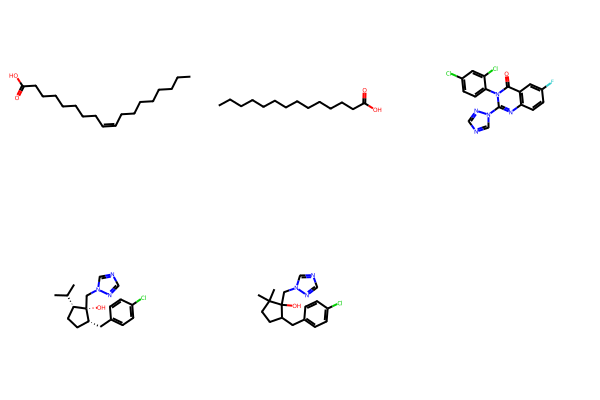

In [63]:
Draw.MolsToGridImage(mol_per_motif_diffDB)

In [64]:
smarts_mol = [Chem.MolFromSmarts(smarts) for smarts in annotated_motifs_diffDB[motif_number]]

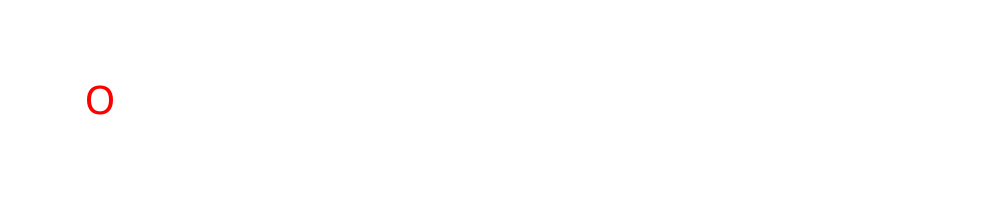

In [67]:
Draw.MolsToGridImage(smarts_mol[:5], molsPerRow=5)

In [29]:
Draw.MolsToGridImage(smarts_mol[9:], molsPerRow=5)

[14:52:27] 

****
Pre-condition Violation
no draw context
Violation occurred on line 211 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\MolDraw2D\MolDraw2DCairo.cpp
Failed Expression: dp_cr
****



RuntimeError: Pre-condition Violation
	no draw context
	Violation occurred on line 211 in file Code\GraphMol\MolDraw2D\MolDraw2DCairo.cpp
	Failed Expression: dp_cr
	RDKIT: 2023.09.4
	BOOST: 1_78
